In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
# Plot single variable trend
model_name = 'PatchTST'
dataset_name = 'weather'

output_dir = f'../outputs/{model_name}/{dataset_name}'
preds_path = os.path.join(output_dir, f'preds_{dataset_name}_inv.npy')
trues_path = os.path.join(output_dir, f'trues_{dataset_name}_inv.npy')

preds = np.load(preds_path)
trues = np.load(trues_path)
print(f'Pred shape: {preds.shape}, True shape: {trues.shape}')

sample_idx = 0   # Index of the sample to plot, can be any int or list, e.g. [0, 10, 100]
step_range = None  # Step range, e.g. (0, 24) to plot the first 24 steps, None for all

def plot_single_var(preds, trues, sample_idx=0, step_range=None):
    if isinstance(sample_idx, int):
        sample_idx = [sample_idx]
    for idx in sample_idx:
        y_pred = preds[idx]
        y_true = trues[idx]
        if step_range is not None:
            s, e = step_range
            y_pred = y_pred[s:e]
            y_true = y_true[s:e]
            steps = np.arange(s, e)
        else:
            steps = np.arange(len(y_pred))
        plt.figure(figsize=(8, 4))
        plt.plot(steps, y_true, label='True', marker='o')
        plt.plot(steps, y_pred, label='Pred', marker='x')
        plt.title(f'Sample {idx}')
        plt.xlabel('Step')
        plt.ylabel('Value')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

plot_single_var(preds, trues, sample_idx=sample_idx, step_range=step_range)

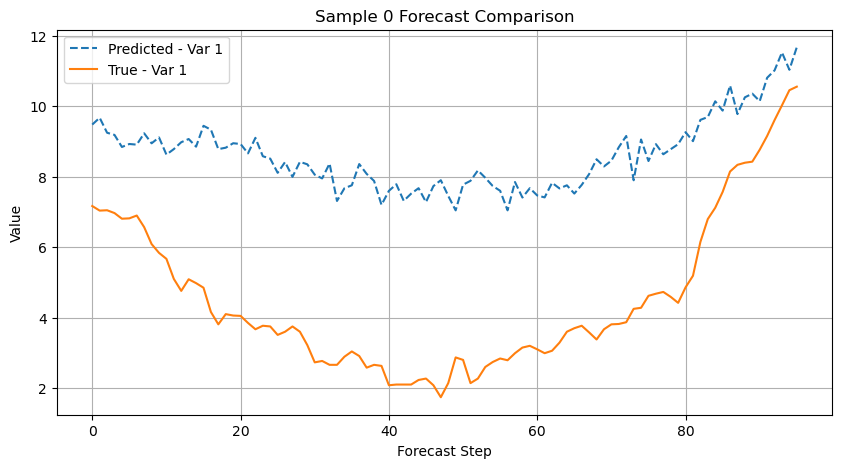

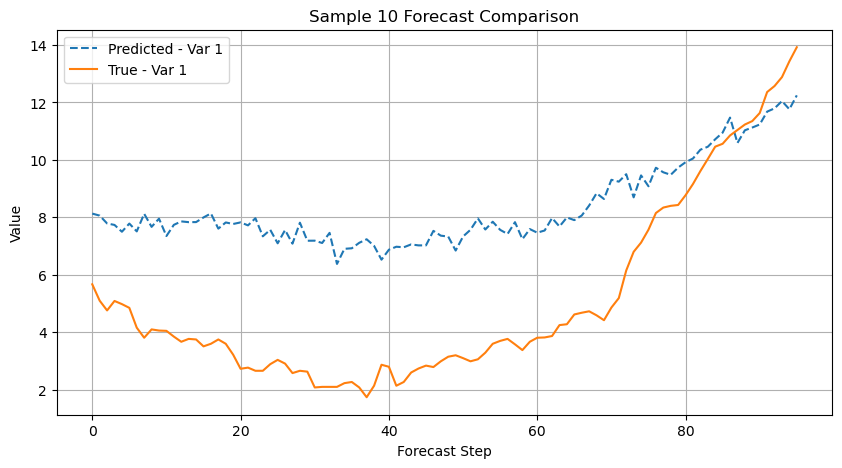

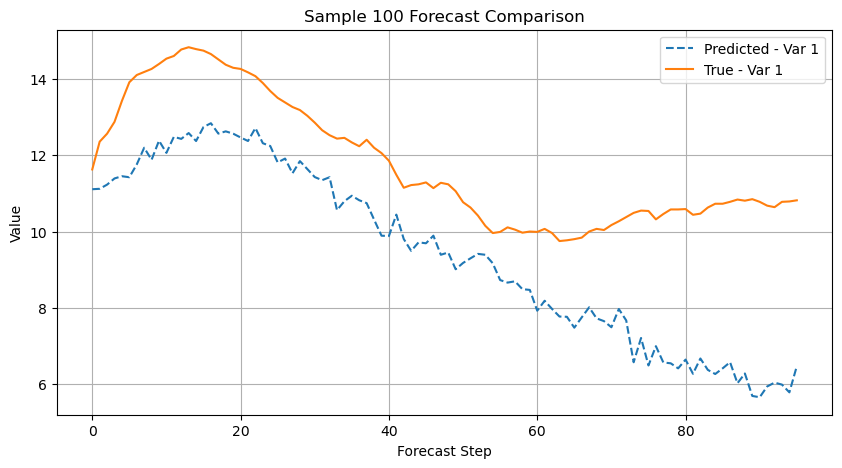

In [4]:
def plot_forecast(preds, trues, var_indices, sample_idx=0, var_names=None, figsize=(10, 5)):
    """
    Plot prediction vs. ground truth for specified variables and sample.
    Args:
        preds: np.ndarray, predictions, shape [num_samples, pred_len, num_vars]
        trues: np.ndarray, ground truth, same shape as preds
        var_indices: int or list[int], indices of variables to plot
        sample_idx: int, which sample to plot
        var_names: list[str], variable names (optional)
        figsize: tuple, figure size
    """
    if isinstance(var_indices, int):
        var_indices = [var_indices]
    plt.figure(figsize=figsize)
    for i, var_idx in enumerate(var_indices):
        pred = preds[sample_idx, :, var_idx]
        true = trues[sample_idx, :, var_idx]
        label_pred = f"Predicted - Var {var_idx}" if not var_names else f"Predicted - {var_names[var_idx]}"
        label_true = f"True - Var {var_idx}" if not var_names else f"True - {var_names[var_idx]}"
        plt.plot(pred, label=label_pred, linestyle='--')
        plt.plot(true, label=label_true, linestyle='-')
    plt.xlabel("Forecast Step")
    plt.ylabel("Value")
    plt.title(f"Sample {sample_idx} Forecast Comparison")
    plt.legend()
    plt.grid(True)
    plt.show()


preds = np.load("../outputs/PatchTST/weather/preds_weather_inv.npy")
trues = np.load("../outputs/PatchTST/weather/trues_weather_inv.npy")

for i in [0, 10, 100]:
    plot_forecast(preds, trues, var_indices=1, sample_idx=i)